# Netflix Movies and TV Shows - Group ID: 2

Group Members:

Buket Özen 25441 

Deniz Küçükahmetler 24879

Guljahan Annagurbanova 26278

Sabanur Mete 25473

Y. Dila Kurumahmutoğlu 25543


## Introduction

<font color="black">
While deciding on Netflix Movies & TV Shows as our project group, we chose this topic after forming a few ideas on what we can do with this project. Thinking that whichever topic we choose we can achieve the best result, we eliminated some of our ideas after a few group meetings. Today, the internet is a tool accessible to children and adults of all ages. We decided to do this project in an effort to keep children away from harmful content and guide them for good.
</font>

### Problem Definition

<font color="black">
Our goal is to identify and make classifications which are suitable contents for children audience. When doing so, we will divide 80% of the data we have as train and 20% as test data. We have concluded that the categories “G (General)”, “TV-G (General Audience)”, “TV-Y7-FV (Directed to Older Children - Fantasy Violence - Contains mild fantasy or comedic violence. Some content could frighten younger children (under age 7))”, “TV-Y7 (Directed to Older Children. Intended for children ages 7 and older. Best suited for children who know the difference between real life and make-believe.)” and “TV-Y (All Children - programs aimed at a very young audience, including children from ages 2-6)” are suitable for children. Rows and columns that are unnecessary will be eliminated. Then we are going to look for correlations between attributes like movies / tv shows, directors, genres, cast members, durations, release years. So we will decide which ones are more child friendly in our data frame in order to establish a child friendliness relationship.
</font>



```
# Bu, `kod olarak biçimlendirilmiş`tir
```

### Utilized Datasets

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

Mounted at ./drive


In [ ]:
fname = "netflix_titles.csv"

df_ = pd.read_csv(join(path_prefix, fname))
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


As we can see from the output above, there are 12 columns and 6234 rows in total. Only the "show_id" and "release_year" columns consist of integer typed values, the rest is object. The built-in type string is considered as object in pandas.  

In [ ]:
df_["rating"].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

There are 14 distinct rating types.

There are standardized abbreviations for movie and TV show ratings as listed above. 

The meanings of these abbreviations are:

*   G: General	
*   TV-G: General Audience
*   PG: Parental Guidance Recommended
*   PG-13: Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13
*   TV-PG: Parental Guidance Suggested
*   TV-MA: Mature Audience Only. Intended for adults and may be unsuitable for children under 17
*   TV-Y7-FV: Directed to Older Children - Fantasy Violence - Contains mild fantasy or comedic violence. Some content could frighten younger children (under age 7)
*   TV-Y7: Directed to Older Children. Intended for children ages 7 and older. Best suited for children who know the difference between real life and make-believe.
*   TV-14: Parents Strongly Cautioned. Intended for children ages 14 and older in the company of an adult
*   R: Restricted – Under 17 requires accompanying parent or adult guardian
*   TV-Y: All Children - programs aimed at a very young audience, including children from ages 2-6
*   NR: Not Rated
*   UR: Unrated
*   NC-17: No Children Under 17 Admitted









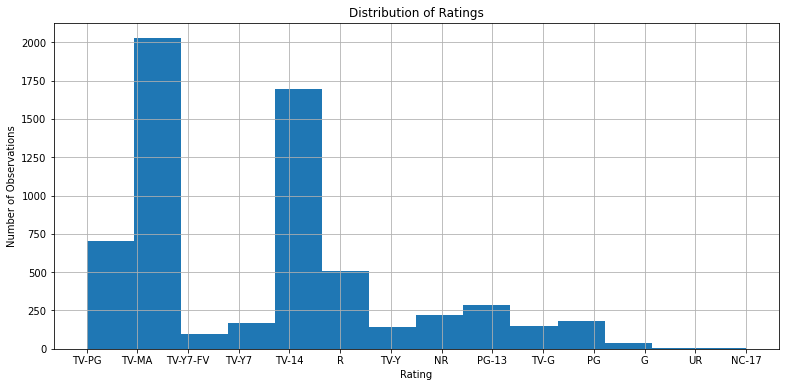

In [ ]:
plt.figure(figsize=(13,6))
df_["rating"].hist(bins=14)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Observations")
plt.show()

In [ ]:
df_.groupby("rating").count()["show_id"].sort_values(ascending=False)

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: show_id, dtype: int64

It is shown that "TV-MA" and "TV-14" constitude the vast majority of the total movies and TV shows which is not suitable for children.



In [ ]:
df_.dropna(subset=["rating"],inplace=True)
df_.isna().sum()["rating"]

0

First the NAN values in "rating" column is dropped.

In [ ]:
df_.drop(df_[(df_["rating"]=="UR") | (df_["rating"]=="NR")].index, inplace=True)
df_.groupby("rating").count()["show_id"].sort_values(ascending=False)

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
NC-17          2
Name: show_id, dtype: int64

Then, the "UR" (unrated) and "NR" (not rated) rows are dropped.

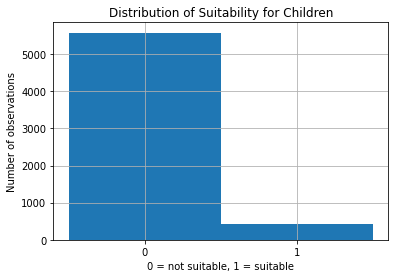

In [ ]:
def find_target(rating):
  if rating in ["TV_Y7","TV-G","TV-Y","TV-Y7-FV","G"]:
    return 1
  return 0 


df_["target"] = df_["rating"].apply(find_target)
plt.title("Distribution of Suitability for Children")
plt.ylabel("Number of observations")
plt.xlabel("0 = not suitable, 1 = suitable")
plt.xticks((0.25,0.75),("0","1"))
df_["target"].hist(bins=2)

TV_Y7, TV-G, TV-Y, TV-Y7-FV, and G are the types of ratings which is generally suitable for children.

find_target function returns 1 if the rating of the movie is suitable for children and 0 vice versa. This information is stored in a new column named "target" which we want to achieve.

From the histogram it is clearly seen that the movies and TV shows that parents have to be careful about, dominates the ones which is suitable for smaller ages. 




In [ ]:
df_.drop(["show_id","country"], axis=1, inplace=True)

The columns that are not useful in the context of this project is also removed.

In [ ]:
df_.isna().sum()

type               0
title              0
director        1948
cast             539
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
target             0
dtype: int64

There are NAN values in three specific columns which has an importance for this project.

In [ ]:
df_.fillna(value="Unknown", inplace=True)
df_.isna().sum()

type            0
title           0
director        0
cast            0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
target          0
dtype: int64

*The* NAN values are converted into "Unknown".

In [ ]:
from sklearn.model_selection import train_test_split
y = df_["target"]
X = df_.drop("target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data is splitted into two parts as train and test with 80% and 20% respectively.


In [ ]:
print(len(X_train),len(X_test))

4799 1200


## Data Exploration

Splitting the dataframe into two parts, movies and shows, to check whether the movies or tvShows have more content suitable for children

In [ ]:
df_m = df_[df_["type"] =="Movie"]
df_s = df_[df_["type"] == "TV Show"]
df_m.head(2)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,target
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0


In [ ]:
df_s.head(2)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,target
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...","September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...","September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0


The rating distribution in Tv Shows & Movies

(checking whether TV shows or Movies have more Child-friendly content)

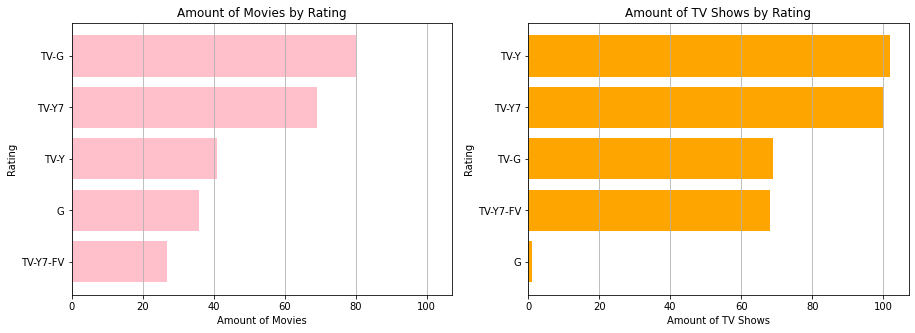

In [ ]:
ratings = df_['rating'].unique()
#print(ratings)
allowed = ["TV-Y7","TV-G","TV-Y","TV-Y7-FV","G"]
dfm = df_m.copy()
dfs = df_s.copy()
dropList = []
for k in ratings:
  if k not in allowed:
    dropList.append(k)
for i in dropList:
  dfm  = dfm.drop(dfm[dfm['rating'] == i].index)
  dfs  = dfs.drop(dfs[dfs['rating'] == i].index)
cnt_m = dfm.groupby('rating')['title'].count().reset_index()
cnt_m = cnt_m.sort_values(by="title", ascending=True, ignore_index=True)
cnt_s = dfs.groupby('rating')['title'].count().reset_index()
cnt_s = cnt_s.sort_values(by="title", ascending=True, ignore_index=True)
#plt.figure(figsize=(13,6))
r = 1
c = 2
fig, ax = plt.subplots(r, c, sharex=True, figsize=(15, 5))

for i in range(2):
  ax[i].set_ylabel("Rating")
  ax[i].grid(axis = 'x')
ax[0].barh(cnt_m.rating, cnt_m.title, color = "pink")
ax[1].barh(cnt_s.rating, cnt_s.title, color = "orange")
ax[0].set_title('Amount of Movies by Rating')
ax[1].set_title('Amount of TV Shows by Rating')
ax[0].set_xlabel("Amount of Movies")
ax[1].set_xlabel("Amount of TV Shows")
plt.show()

From the graph above, we can observe that there are more content suitable for children audience in tv shows rather than movies

For each ranking, we look at directors and amount of movies & tv shows they have directed

In [ ]:
#there are some movies and tv shows directed by multiple directors, (director = list of directors)
#we made the movie to count for each of the directors in that list
rating_dir = []
max_dir = 0
df_c = df_[['rating', 'director']]
for index, row in df_c.iterrows():
    if row['director'] != 'Unknown':
        dirs =  row['director'].split(",")
        if max_dir <= len(dirs):
          max_dir = len(dirs) # maximum number of directors movies/tv shows had
        for i in dirs:
          i = i.strip()
          rating_dir.append([row['rating'], i])
df_r_d = pd.DataFrame(rating_dir, columns=['rating', 'director'])
grp = df_r_d.groupby("rating")["director"].value_counts()
df_r_d

,rating,director
0,TV-PG,Richard Finn
1,TV-PG,Tim Maltby
2,TV-14,Fernando Lebrija
3,R,Gabe Ibáñez
4,TV-MA,Rodrigo Toro
...,...,...
4587,TV-Y7,Thomas Astruc
4588,TV-MA,Vikramaditya Motwane
4589,TV-MA,Anurag Kashyap
4590,TV-14,Jung-ah Im


Directors and amount of movies/shows they've directed in children-friendly ratings

In [ ]:
#this is a dataframe with directors and their amount of work, in the children friendly rating
ratings = df_['rating'].unique()
df_ch = df_r_d.copy()
ListA = ["PG-13", "PG", "TV-PG", "TV-MA", "TV-14", "R", "NG-17"]
dropList = []
for k in ratings:
  if k in ListA:
    dropList.append(k)
for i in dropList:
  df_ch = df_ch.drop(df_ch[df_ch['rating'] == i].index)

grpch = df_ch.groupby("rating")["director"].value_counts()
ch_rat_dir_count = []
for i in grpch.items():
  a = list(i[0])
  a.append(i[1])
  ch_rat_dir_count.append(a)
ch = pd.DataFrame(ch_rat_dir_count,columns = ["rating", "director", "amount of content"])
ch.reset_index(drop=True, inplace=True)
ch


,rating,director,amount of content
0,G,Ben Wallis,2
1,G,Joe Camp,2
2,G,Larry Latham,2
3,G,Phil Weinstein,2
4,G,Robert Vince,2
...,...,...,...
247,TV-Y7-FV,Prakash Satam,1
248,TV-Y7-FV,Suhas Kadav,1
249,TV-Y7-FV,Sumit Das,1
250,TV-Y7-FV,Victor Cook,1


We see that some directors directed more child-friendly content, this can help us in our classification, i.e. if a movie/show directed by Ben Wallis, it is more likely to have more child-friendly content

Directors and amount of movies/shows they've directed in non-children-friendly ratings

In [ ]:
#this is a dataframe with directors and their amount of work, in children non-friendly rating
df_nch = df_r_d.copy()
ListA = ["PG-13", "PG", "TV-PG", "TV-MA", "TV-14", "R", "NG-17"]
dropList = []
for k in ratings:
  if k not in ListA:
    dropList.append(k)
for i in dropList:
  df_nch = df_nch.drop(df_nch[df_nch['rating'] == i].index)

grpch = df_nch.groupby("rating")["director"].value_counts()
nch_rat_dir_count = []
for i in grpch.items():
  a = list(i[0])
  a.append(i[1])
  nch_rat_dir_count.append(a)
nch = pd.DataFrame(nch_rat_dir_count,columns = ["rating", "director", "amount of content"])
nch.reset_index(drop=True, inplace=True)
nch

,rating,director,amount of content
0,PG,Robert Rodriguez,6
1,PG,Robert Vince,4
2,PG,Justin G. Dyck,3
3,PG,Steve Carr,3
4,PG,Steven Spielberg,3
...,...,...,...
3642,TV-PG,Yann Arthus-Bertrand,1
3643,TV-PG,Yee Tung-Shing,1
3644,TV-PG,Yoshitaka Takeuchi,1
3645,TV-PG,Zakariya,1


Checking if a director belongs to both groups (children-friendly and non-children friendly), later these directors can be analyzed separately, by giving a threshold of 1 or 2

['Luis Ara', 'Roger Allers', 'Mana Yasuda', 'Justin G. Dyck', 'Ron Oliver', 'Jon M. Chu', 'Martin Gorst', 'Alastair Fothergill', 'Sooraj R. Barjatya', 'Fisher Stevens', 'Greg MacGillivray', 'Simon Wells', 'Mae Czarina Cruz', 'Nagesh Kukunoor', 'Eric Radomski', 'Leslie Iwerks', 'Robert Vince', 'Chris Buck', 'James Yukich', 'Jani Lachauer', 'Byron Howard', 'Joe Camp', 'Jon Rosenbaum', 'John Ford', 'Savage Steve Holland', 'Clay Glen']


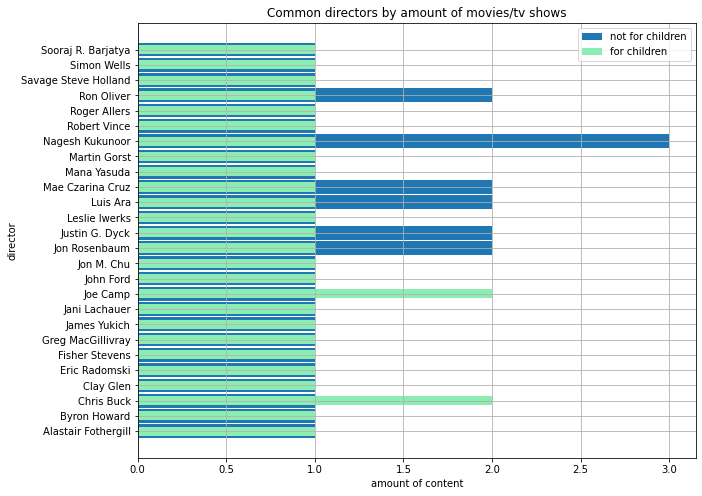

In [ ]:
ch_dir =  list(ch['director'])
nch_dir =  list(nch['director'])
common = set(ch_dir).intersection(nch_dir)
common = list(common)
print(common)
dirs = []
nch_rating = []
nch_amount = []
ch_rating = []
ch_amount = []

if len(common) >= 1:
  a = nch[nch["director"] == common[0]]
  b = ch[ch["director"] == common[0]]
  for i in range(1, len(common)):
    a = a.append(nch[nch["director"] == common[i]])
    b = b.append(ch[ch["director"] == common[i]])
grpB = b.groupby('director')['rating'].count()
grpA = a.groupby('director')['rating'].count()
for k,v in grpB.items():
  ch_rating.append(k)
  ch_amount.append(v)
for k,v in grpA.items():
  nch_rating.append(k)
  nch_amount.append(v)
fig = plt.figure(figsize=(10,8))

plt.barh(nch_rating, nch_amount, height = 0.9)
plt.barh(ch_rating, ch_amount, height= 0.6, color = "#8BEDB2")
plt.title("Common directors by amount of movies/tv shows")
plt.legend(['not for children','for children'])
plt.xlabel('amount of content')
plt.ylabel('director')
plt.grid()

To understand the distribution of movies suitable for children, we can check the distribution among movie genres. We grouped the movies/tv shows with respect to their genres and marked them as children friendly and non-children friendly. 

<Figure size 1080x720 with 0 Axes>

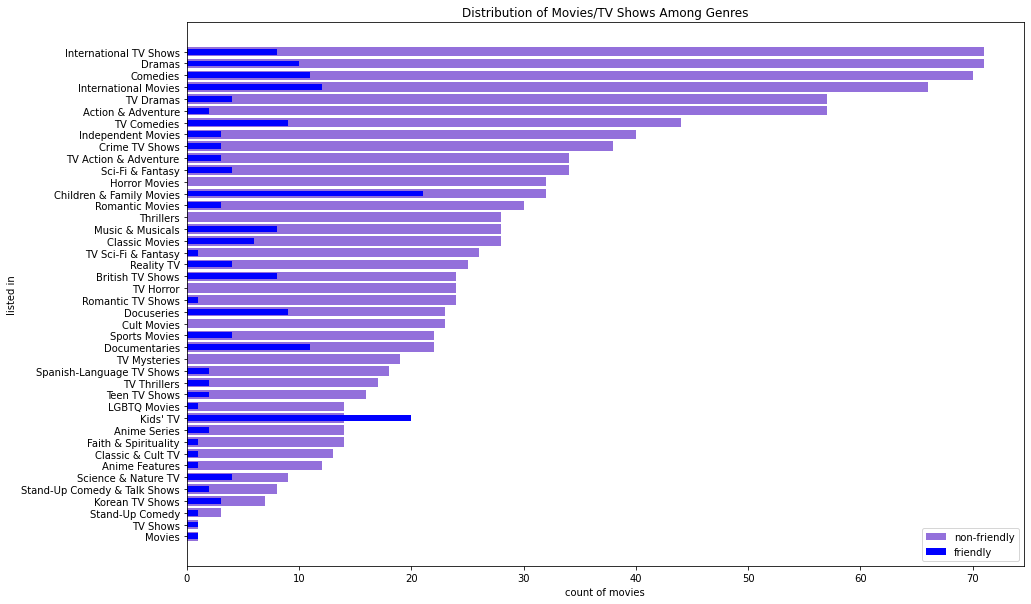

In [ ]:
#get children-friendly movies df
List_f = ["PG-13", "PG", "TV-PG", "TV-MA", "TV-14", "R", "NG-17"]
List_nf = ["TV-Y7", "TV-G", "TV-Y", "TV-Y7-FV", "G"]

friendly = df_.copy()

for i in List_nf:
  friendly = friendly.drop(friendly[friendly["rating"] == i].index)


#get non-children friendly movies df
n_friendly = df_.copy()

for i in List_f:
  n_friendly = n_friendly.drop(n_friendly[n_friendly["rating"] == i].index)

#group friendly
frank_group = friendly.groupby("listed_in")
listed_in_groups = frank_group["rating"] 
d = listed_in_groups.value_counts().sort_values()

type_count_dict = {}
for name, group in listed_in_groups:
  names = name.split(",")
  for name in names:
    name = name.strip()
    if name in type_count_dict:
      type_count_dict[name] +=1
    else: 
      type_count_dict[name] =1

plt.figure(figsize = (15,10)) 
type_count_dict = {k: v for k, v in sorted(type_count_dict.items(), key=lambda item: item[1])}

nfrank_group = n_friendly.groupby("listed_in")
listed_in_groups2 = nfrank_group["rating"] 
d2 = listed_in_groups2.value_counts().sort_values()

print(listed_in_groups2)

type_count_dict2 = {}
for name, group in listed_in_groups2:
  names = name.split(",")
  for name in names:
    name = name.strip()
    if name in type_count_dict2:
      type_count_dict2[name] +=1
    else: 
      type_count_dict2[name] = 1

type_count_dict2 = {k: v for k, v in sorted(type_count_dict2.items(), key=lambda item: item[1])}

plt.figure(figsize = (15,10)) 
plt.barh(list(type_count_dict.keys()), list(type_count_dict.values()), height = 0.8, color = "mediumpurple") 
plt.barh(list(type_count_dict2.keys()), list(type_count_dict2.values()), height = 0.5, color = "blue") 
plt.ylabel("listed in")
plt.xlabel("count of movies")
plt.title("Distribution of Movies/TV Shows Among Genres")
plt.legend(["non-friendly", "friendly"])
plt.show()

As it can be seen, in some genres the distribution significance is too high. For instance, "Thriller" genre is only filled with children non-friendly ones. In contrast, "Kids" genre is mostly filled with children friendly ones. Thus, genre distribution decided to be an important indicator while categorizing the movies/tv shows. That's why we then modified the dataframe to make the genre available for the machine learning algorithms. We created columns for each genre and then initialized it to 0. Afterwards for each row, we made the respective genre 1 in a one-hot encoding manner. Updated dataframe's first 10 rows can be seen below.

In [ ]:
#add genre as columns 
union_of_genres = set(type_count_dict2.keys()).union(set(type_count_dict.keys())) #take all genres in the df 

extended_df = df_.copy()

#make each genre a column and initialize it to 0
for genre in list(union_of_genres):
  extended_df[genre] = 0

#set the counter for each genre
for idx, row in extended_df.iterrows():
  genres = extended_df.loc[idx]["listed_in"].split(",")
  for i in genres:
    i = i.strip()
    extended_df.at[idx,i] =  1

extended_df.head(10)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,target,Sci-Fi & Fantasy,Comedies,Action & Adventure,Independent Movies,Horror Movies,TV Thrillers,Kids' TV,Anime Series,Movies,Teen TV Shows,Classic Movies,Classic & Cult TV,International Movies,Thrillers,TV Sci-Fi & Fantasy,Stand-Up Comedy,Sports Movies,Dramas,Cult Movies,Anime Features,TV Horror,International TV Shows,Korean TV Shows,Reality TV,Crime TV Shows,LGBTQ Movies,British TV Shows,Spanish-Language TV Shows,TV Shows,Children & Family Movies,Documentaries,Faith & Spirituality,TV Mysteries,Science & Nature TV,Romantic TV Shows,Music & Musicals,TV Dramas,TV Action & Adventure,Romantic Movies,Stand-Up Comedy & Talk Shows,TV Comedies,Docuseries
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...","September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...","September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...","September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,TV Show,Fire Chasers,Unknown,Unknown,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Afterwards we tried to find a correlation with cast members. However, since there are too many cast members, we first found the intersection of cast members in children friendly and non-friendly movies/tv shows. For further simplification, we didn't get the cast members with 2 or less intersecting movies/tv shows. The resulting plot can be seen below.

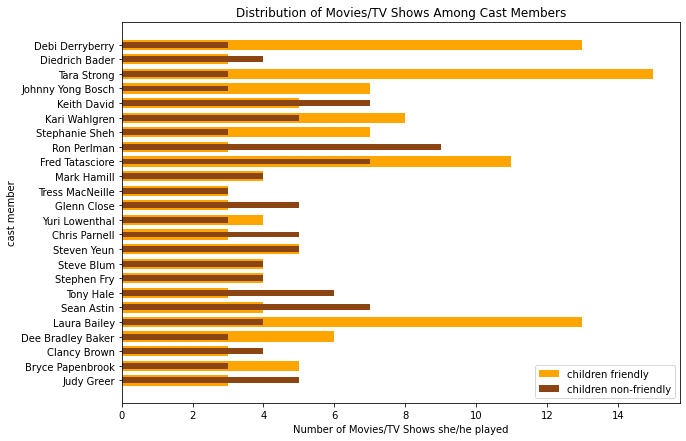

In [ ]:
f_df = n_friendly.copy()
nf_df = friendly.copy()

#grouping for children friendly 
frank_group = f_df.groupby("cast")
listed_in_groups = frank_group["rating"] 
d = listed_in_groups.value_counts().sort_values()

type_count_dict = {}
for name, group in listed_in_groups:
  names = name.split(",")
  for name in names:
    name = name.strip()
    if name in type_count_dict:
      type_count_dict[name] +=1
    else: 
      type_count_dict[name] =1

type_count_dict = {k: v for k, v in sorted(type_count_dict.items(), key=lambda item: item[1])}

reduced_dict = {}
for key in type_count_dict.keys(): #don't take the ones with 2 or less movies/tv shows
  if type_count_dict[key] > 2:
     reduced_dict[key] = type_count_dict[key]

#grouping for non-children friendly 
nfrank_group = nf_df.groupby("cast")
listed_in_groups2 = nfrank_group["rating"] 
d2 = listed_in_groups2.value_counts().sort_values()

type_count_dict2 = {}
for name, group in listed_in_groups2:
  names = name.split(",")
  for name in names:
    name = name.strip()
    if name in type_count_dict2:
      type_count_dict2[name] +=1
    else: 
      type_count_dict2[name] =1
type_count_dict2 = {k: v for k, v in sorted(type_count_dict2.items(), key=lambda item: item[1])}

reduced_dict2 = {}
for key in type_count_dict2.keys(): #don't take the ones with 2 or less movies/tv shows
  if type_count_dict2[key] >2:
     reduced_dict2[key] = type_count_dict2[key]


intersection = (reduced_dict.keys() & reduced_dict2.keys())
#take intersecting keys in friendly 
is_f = {}
for i in intersection:
  is_f[i] = reduced_dict[i]

#take intersecting keys in non-friendly 
is_nf = {}
for i in intersection:
  is_nf[i] = reduced_dict2[i]



plt.figure(figsize = (10,7)) 
plt.barh(list(is_f.keys()), list(is_f.values()), color = "orange", height = 0.7) 
plt.barh(list(is_nf.keys()), list(is_nf.values()), color = "saddlebrown", height = 0.4) 
plt.legend(["children friendly", "children non-friendly"])
plt.ylabel("cast member")
plt.xlabel("Number of Movies/TV Shows she/he played")
plt.title("Distribution of Movies/TV Shows Among Cast Members")
plt.show()


Even though this plot shows a much simplified version of the cast member distribution, it was enough for us to understand that cast members is an important parameter while classifying the data as children friendly and children non-friendly. We decided to add the cast member information in some way to our dataframe but one hot encoding wouldn't be efficient enough since there is 26652 many cast members in the overall dataframe. So, we found the movie/tv show with the maximum number of cast members and we created that many columns. Then we indexed all of the cast members from 0 to 26651. Finally, for each movie/tv show we assigned the indexes of the cast members starting from the column "CastMember0" up to column "CastMember49". We replaced the empty entries to -1 in those columns.

In [ ]:
union_of_cast = set(type_count_dict2.keys()).union(set(type_count_dict.keys())) #put all cast members in a list

print("The total number of cast members in movies and TV shows:", len(union_of_cast))

The total number of cast members in movies and TV shows: 26652


In [ ]:
###############################################add cast members to extended df########################################33

ext_cast_df = extended_df.copy()

#find the movie with the most number of cast members included
max_cast_number = 0 
for idx, row in ext_cast_df.iterrows():
  if len(list(ext_cast_df.loc[idx]["cast"].split(","))) > max_cast_number:
    max_cast_number= len(list(row["cast"].split(",")))

print("Number of maximum number of cast members in a Movie/TV Show:",max_cast_number)

#create "max cast members for a show" many columns and initialize it to NaN
nan_list =  ["NaN"]*ext_cast_df.shape[0]

for i in range(max_cast_number):
  col_name = "CastMember"+str(i)
  ext_cast_df[col_name] = nan_list

#index the cast members
union_of_cast = list(set(type_count_dict2.keys()).union(set(type_count_dict.keys())))#put all cast members in a list
cast_member_ids = {}
for i in union_of_cast: 
  cast_member_ids[i] = union_of_cast.index(i)

#fill the columns for each movie/tv show with cast member ids (indexes)
for idx, row in ext_cast_df.iterrows():
  cast_list = ext_cast_df.loc[idx]["cast"].split(",")
  count = 0
  for i in cast_list:
    i = i.strip()
    if i != "Unknown":
      member_idx = cast_member_ids[i]
      column = "CastMember"+str(count)
      count += 1
      ext_cast_df.at[idx,column] = member_idx

  while count<max_cast_number: #fill the rest with -1
      column = "CastMember"+str(count)
      count += 1
      ext_cast_df.at[idx,column] = -1 

ext_cast_df.iloc[:,-50:]

Number of maximum number of cast members in a Movie/TV Show: 50


,CastMember0,CastMember1,CastMember2,CastMember3,CastMember4,CastMember5,CastMember6,CastMember7,CastMember8,CastMember9,CastMember10,CastMember11,CastMember12,CastMember13,CastMember14,CastMember15,CastMember16,CastMember17,CastMember18,CastMember19,CastMember20,CastMember21,CastMember22,CastMember23,CastMember24,CastMember25,CastMember26,CastMember27,CastMember28,CastMember29,CastMember30,CastMember31,CastMember32,CastMember33,CastMember34,CastMember35,CastMember36,CastMember37,CastMember38,CastMember39,CastMember40,CastMember41,CastMember42,CastMember43,CastMember44,CastMember45,CastMember46,CastMember47,CastMember48,CastMember49
0,15764,13341,9351,24046,3340,25754,4934,24619,18191,17439,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,3569,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,16911,10752,4178,18506,3639,13547,3681,25422,8057,16247,19438,6825,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,6825,26478,26369,25673,476,5605,22838,16911,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,11608,21916,14732,11530,19856,25761,4677,4494,16003,17857,20928,20480,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,3964,12662,20373,7770,11992,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6228,22426,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6230,6616,4792,17434,8569,20296,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6232,3233,13637,15532,19550,12356,26149,26100,599,9219,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


The distribution of directors in child-(non)friendly movies/tv shows was one of the factors we wanted to analyze from the beginning, because it can be one of the significant indicators in our classification. Therefore, we decided to add director columns to our extended dataframe. To represent directors, we could use one-hot-encoding method. However, as the total number of directors is more than 3000, we decided not to use one-hot-encoding.
We found the maximum number of directors (max_dir) we could have in a movie/tv show, and we added max_dir many columns to our extended dataframe,
each director had a unique id(starting from 1);
then we filled our ext_df extended dataframe with director ids for each movie/show

In [ ]:
#adding directorN columns
ext_df = ext_cast_df.copy()
directors = {} #it will keep ids of directors, ids start from 1

#adding to director columns with initial value 0 to the extended dataframe
for i in range(0, max_dir):  
  ext_df['director'+str(i)] = 0
i = 1
for dir in rating_dir:   #keys are directors #values are their ids
  if dir[1] not in directors:
    directors[dir[1]] = i
    i+=1
print("Total number of directors", len(directors))  

#fill the rows for each movie/tv show with the director ids, they have been directed by
for idx, row in ext_df.iterrows():
  cast_list = ext_df.loc[idx]["director"].split(",")
  count = 0
  for i in cast_list:
    i = i.strip()
    if i != "Unknown":
      member_idx = directors[i]
      column = "director"+str(count)
      count += 1
      ext_df.at[idx,column] = member_idx

ext_df.head(5)


Total number of directors 3475


,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,target,Sci-Fi & Fantasy,Comedies,Action & Adventure,Independent Movies,Horror Movies,TV Thrillers,Kids' TV,Anime Series,Movies,Teen TV Shows,Classic Movies,Classic & Cult TV,International Movies,Thrillers,TV Sci-Fi & Fantasy,Stand-Up Comedy,Sports Movies,Dramas,Cult Movies,Anime Features,TV Horror,International TV Shows,Korean TV Shows,Reality TV,Crime TV Shows,LGBTQ Movies,British TV Shows,Spanish-Language TV Shows,TV Shows,...,CastMember23,CastMember24,CastMember25,CastMember26,CastMember27,CastMember28,CastMember29,CastMember30,CastMember31,CastMember32,CastMember33,CastMember34,CastMember35,CastMember36,CastMember37,CastMember38,CastMember39,CastMember40,CastMember41,CastMember42,CastMember43,CastMember44,CastMember45,CastMember46,CastMember47,CastMember48,CastMember49,director0,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,0,0,0,0,0,0,0,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...","September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...","September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,0,0,0,0,0,0,0,0,0,0,0


Duration of the movies might be an important indicator. Below is the 
box plots of children friendly and non-friendly movies with respect to the duration. Outliers are removed according to the IQR rule.

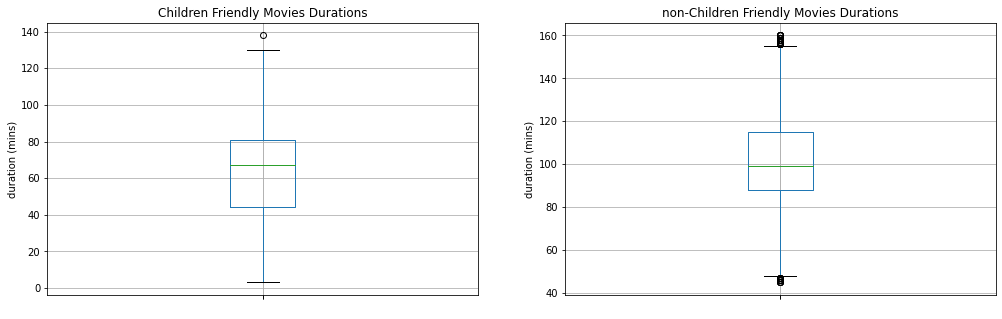

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#take friendly/non-friendly movies
f_dff = f_df[f_df["type"] == "Movie"]
nf_dff = nf_df[nf_df["type"] == "Movie"]

f_dff['duration_mins'] = f_dff["duration"].str[:-3]
f_dff["duration_mins"] = pd.to_numeric(f_dff["duration_mins"])


nf_dff['duration_mins'] = nf_dff.duration.str[:-3]
nf_dff["duration_mins"] = pd.to_numeric(nf_dff["duration_mins"])

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(17, 5))

#find IQ range for friendly, remove outliers
f_mean_duration = np.mean(f_dff["duration_mins"])

par_q3, par_q1 = np.percentile(f_dff["duration_mins"], [75 ,25])
par_IQR = par_q3 - par_q1

par_min = par_q1 - par_IQR*1.5
par_max = par_q3 + par_IQR*1.5

f_no_outliers =f_dff.query('@par_min <= duration_mins <= @par_max')
ax1 = f_no_outliers.boxplot(column=["duration_mins"], ax = axes[0])

#find IQ range for non-friendly, remove outliers
k_q3, k_q1 = np.percentile(nf_dff["duration_mins"], [75 ,25])
k_IQR = k_q3 - k_q1

k_min = k_q1 - k_IQR*1.5
k_max = k_q3 + k_IQR*1.5

nf_no_outliers = nf_dff.query('@k_min <= duration_mins <= @k_max')
ax2 = nf_no_outliers.boxplot(column=["duration_mins"], ax = axes[1])
axes[0].set_xticklabels([" "])

axes[0].set_title("Children Friendly Movies Durations")
axes[0].set_ylabel("duration (mins)")
axes[1].set_title("non-Children Friendly Movies Durations")
axes[1].set_ylabel("duration (mins)")
plt.show()

Their mean and interquartile range seems significantly different. To understand if there is a relationship between movies duration and suitability for children, we can plot non-friendly and friendly duration histogram. The difference of two categories can be easily seen. 

Maximum - minimum duration of children friendly shows: 180 - 3.
Mean duration of children friendly shows: 64.16470588235295.
Maximum - minimum duration of non children friendly shows: 312 - 12.
Mean duration of children friendly shows: 101.71936758893281.


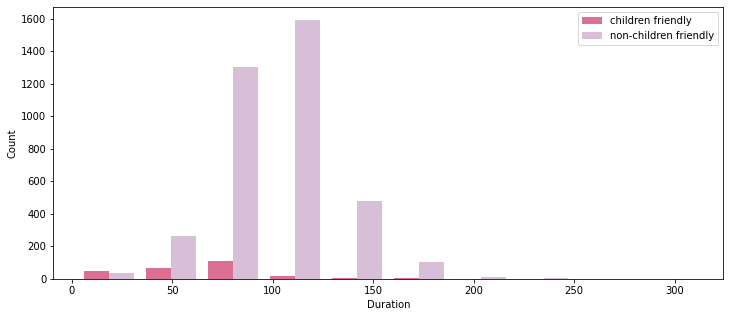

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
#ax.plot(np.linspace(0, max(f_dff["duration_mins"]),255),f_dff["duration_mins"].sort_values())
#ax.plot(np.linspace(0, max(nf_dff["duration_mins"]),3795),nf_dff["duration_mins"].sort_values())
ax.hist([f_dff["duration_mins"], nf_dff["duration_mins"]], color = ["palevioletred", "thistle"])
ax.legend(["children friendly", "non-children friendly"])
ax.set_xlabel("Duration")
ax.set_ylabel("Count")
print("Maximum - minimum duration of children friendly shows: " , max(f_dff["duration_mins"]), " - ", min(f_dff["duration_mins"]), ".", sep="")
print("Mean duration of children friendly shows: " , np.mean(f_dff["duration_mins"]), ".", sep="")

print("Maximum - minimum duration of non children friendly shows: " , max(nf_dff["duration_mins"]), " - ", min(nf_dff["duration_mins"]), ".", sep="")
print("Mean duration of children friendly shows: " , np.mean(nf_dff["duration_mins"]), ".", sep="")



We have found that shows have more suitable content for children rather than movies, therefore, we decided to add "type_mod" column to our ml model ( Movies -> 1, Tv shows -> 0)

In [ ]:
ext_df['type_mod'] = -1
for idx, row in ext_df.iterrows():
  if ext_df.loc[idx]['type'] == 'Movie':
    ext_df.at[idx,'type_mod'] = 1
  else:
    ext_df.at[idx,'type_mod'] = 0

We also looked for a relation between the release years of the shows and the suitability for the children. Blue parts of the 2 plots below represents the ratings suitable for children. Unlikely the other significant parameters we found to differentiate the movies/tv shows suitable and non-suitable for children, release year didn't show a indicating sign. Thus, we decided not to use it.

Text(0, 0.5, 'release year')

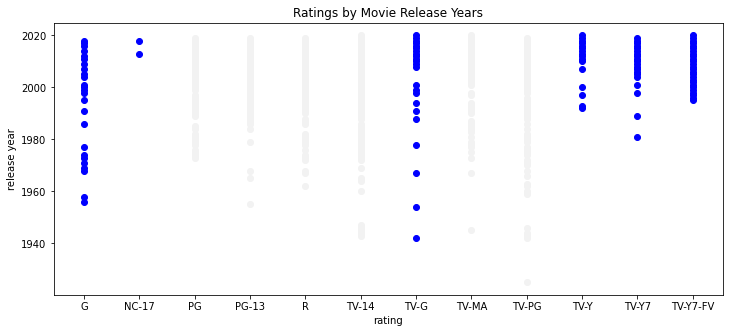

In [ ]:
df_copy = df_.copy()
#dategroups = df_copy.groupby["data_added"]
df_copy[df_copy['date_added'] == "Unknown"] = None
dategroups = pd.to_datetime(df_copy["date_added"])


#group by data added
#each dot is a movie
#change the count of that movie across years

#add the count of that movie till that date as a new col
dategroups = df_copy.groupby(["rating", "date_added"])


#group by date added and count  
df_copy.sort_values(by = "release_year")

gs = df_copy.groupby(["rating", "release_year"])

List_nf = ["PG-13", "PG", "TV-PG", "TV-MA", "TV-14", "R", "NG-17"]

fig, ax = plt.subplots(figsize = (12,5))
count = 0
for name, group in gs:
  if name[0] not in List_nf:
    ax.plot(name[0], name[1],  marker='o', linestyle='', ms=6, label=name[1], c = 'b')
  else:
    ax.plot(name[0], name[1],  marker='o', linestyle='', ms=6, label=name[1], c = "0.95")

ax.set_title("Ratings by Movie Release Years")
ax.set_xlabel("rating")
ax.set_ylabel("release year")


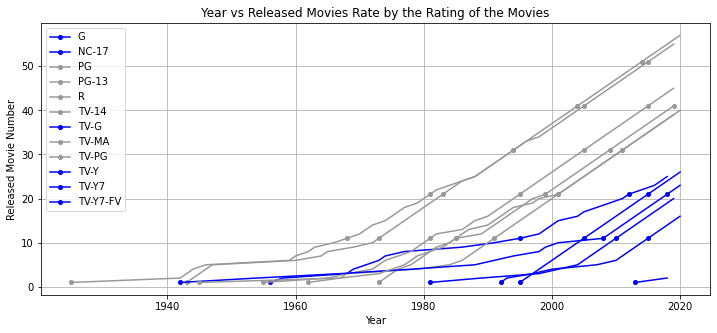

In [ ]:
def fun(year_list):
  year_list = sorted(year_list, reverse = True)
  count_list = []
  count = 0
  for i in year_list:
    count +=1
    count_list.append(count)
  return count_list

#total released over years
total_release = {} # (rating: date1, date2 ... )
for name, group in gs:
  if name[0] in total_release:
    total_release[name[0]].append(name[1])
  else:
    total_release[name[0]] = [name[1]]
    

fig, ax = plt.subplots(figsize = (12,5))
#ax.set_yticks((2, 5, 7, 10))
for key in total_release.keys():
  counts = fun(total_release[key])
  years = total_release[key]
  if key in List_nf:
    line, = ax.plot(years, counts, marker='o', markevery = 10, ms = 4, color = "0.60")
    line.set_label(key)
  else:
    line, = ax.plot(years, counts, marker='o', markevery = 10, ms = 4, color = "b")
    line.set_label(key)


ax.set_xlabel("Year")
ax.set_ylabel("Released Movie Number")
ax.set_title("Year vs Released Movies Rate by the Rating of the Movies")
ax.grid("True")

ax.legend()

Up to today, number of both of the child friendly and non child friendly rating of the movies increased. Because in total number of movies released increased through time. It is not possible to find correlation between child-friendly rating and released year. 

In [ ]:
ext_df.shape[1]

117

In [ ]:
ext_df

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,target,Sci-Fi & Fantasy,Comedies,Action & Adventure,Independent Movies,Horror Movies,TV Thrillers,Kids' TV,Anime Series,Movies,Teen TV Shows,Classic Movies,Classic & Cult TV,International Movies,Thrillers,TV Sci-Fi & Fantasy,Stand-Up Comedy,Sports Movies,Dramas,Cult Movies,Anime Features,TV Horror,International TV Shows,Korean TV Shows,Reality TV,Crime TV Shows,LGBTQ Movies,British TV Shows,Spanish-Language TV Shows,TV Shows,...,CastMember24,CastMember25,CastMember26,CastMember27,CastMember28,CastMember29,CastMember30,CastMember31,CastMember32,CastMember33,CastMember34,CastMember35,CastMember36,CastMember37,CastMember38,CastMember39,CastMember40,CastMember41,CastMember42,CastMember43,CastMember44,CastMember45,CastMember46,CastMember47,CastMember48,CastMember49,director0,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,type_mod
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,0,0,0,0,0,0,0,0,0,0,0,1
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...","September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...","September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Unknown,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6228,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6230,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",Unknown,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc

## Machine Learning Models

### Implementation

In [ ]:
import nltk
nltk.download()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

**Before applying various Machine Learning algorithms, we first applied text vectorization on the "description" column. This column provides an idea for content of the movie or TV-show. For example movie description containing "kill", "murder", "sexual" etc. will definitely adress a not children-friendly movie.**

In [ ]:
#bag of words

stop_words = stopwords.words("english")
vectorizer = CountVectorizer(stop_words=stop_words)


**Stop words are frequenlty used words in any language, but in this project the list of stop words in English are filtered out. For example "the","I","a" etc. Such words does not provide useful information thus they have to be removed/tokenized.**

In [ ]:
# Implementing Random Forest

# features
x = ext_df.drop("target", axis=1).iloc[:,9:116]
# target
y = ext_df["target"]

# to split data into test-training for the model
# 80% for training and 20% for test
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)


x_train2 = vectorizer.fit_transform(x_train["description"]) #learn vocab by train set 
x_test2 = vectorizer.transform(x_test["description"]) #test vocab by test set



feature_names = vectorizer.get_feature_names()
print("There are", len(feature_names),"features found.")
#vectorizer.vocabulary_       -> uncomment to see the words and their counts

x_train2

There are 14238 features found.


<4799x14238 sparse matrix of type '<class 'numpy.int64'>'
	with 69904 stored elements in Compressed Sparse Row format>

**We took the corpus of text in "description" column and detected the unique words. Then we counted the ocurrences of these words in text = Bag of Words**

In [ ]:
x_train.drop("description", axis=1, inplace=True)
x_test.drop("description", axis=1, inplace=True)

**After doing necessary changes on the "description" column, it is dropped.**

In [ ]:
count_vect_df = pd.DataFrame(x_train2.todense(), columns=vectorizer.get_feature_names())
count_vect_df.index = x_train.index
joint_train = pd.concat([x_train,count_vect_df], axis=1,)
joint_train.shape

(4799, 14344)

**Train matrix is converted into dataframe for concatenation of the vectorized features (14228 words) with the other features.(106 columns) After this process we obtain the final df with 14344 columns which is ready to used for machine learning.**

In [ ]:
x_test.shape

(1200, 106)

In [ ]:
count_vect_df2 = pd.DataFrame(x_test2.todense(), columns=vectorizer.get_feature_names())
count_vect_df2.index = x_test.index
joint_test = pd.concat([x_test,count_vect_df2], axis=1)
joint_test.shape

(1200, 14344)

**Same steps are applied on the test data.**

In [ ]:
# training random forest and fitting of model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state= 42, criterion = 'gini')
random_forest_model.fit(joint_train, y_train)

# to calculate accuracy
prediction_random_forest = random_forest_model.predict(joint_test)
accuracy = accuracy_score(y_test, prediction_random_forest)
print("Accuracy on test set:",accuracy)


Accuracy on test set: 0.9366666666666666


**Random forest is applied, the accuracy we obtain is 93.66%.**

In [ ]:
scores = cross_val_score(LogisticRegression(), joint_train, y_train, cv = 5)
print("The score of cross-validation is",np.mean(scores))

logistic_regression = LogisticRegression()
logistic_regression.fit(joint_train,y_train)
print("Logistic regression score for training set:",logistic_regression.score(joint_train, y_train))
print("Logistic regression score for testing set:",logistic_regression.score(joint_test, y_test))
predictions = logistic_regression.predict(joint_test)


The score of cross-validation is 0.905397766770942
Logistic regression score for training set: 0.906438841425297
Logistic regression score for testing set: 0.8991666666666667


**The cross-validation score is 90.5%. Logistic regression scores are 90.6% and 90% for the training set and testing set respectively.**

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

grid_random_forest = GridSearchCV(random_forest_model, param_grid= {'n_estimators': [100,200,300,400,500], 'min_samples_split': [2,3,4,5]})
grid_random_forest.fit(joint_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

**As a tuning technique GridSearchCv is applied in order to obtain the optimum values for hyperparameters.**

In [ ]:
# get best param
grid_random_forest.best_params_

{'min_samples_split': 2, 'n_estimators': 300}

**Best parameters are "2" for the 'min_samples_split' and "300" for the 'n_estimators.**

**Optimum parameters are obtained by best_params_**

In [ ]:
# make prediction

prediction_grid_random_forest = grid_random_forest.predict(joint_test)

# calculate new accuracy

accuracy_grid = accuracy_score(y_test, prediction_grid_random_forest)

print("New accuracy score by using grid search:",accuracy_grid)


New accuracy score by using grid search: 0.9375


In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = grid_random_forest.predict(joint_test)
mat = confusion_matrix(y_test,y_pred = y_prediction)

# check accuracy score
True_values=0
for i in range(mat.shape[0]):
  True_values += mat[i][i]
acc_mat= True_values/mat.sum()
print("accuracy for confusion matrix:")
acc_mat

accuracy for confusion matrix:


0.9375

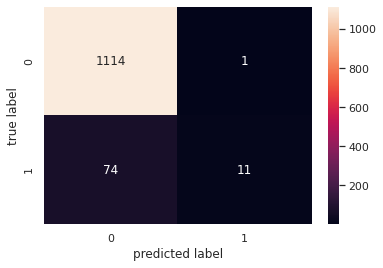

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
# check f1 score 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1115
           1       0.92      0.13      0.23        85

    accuracy                           0.94      1200
   macro avg       0.93      0.56      0.60      1200
weighted avg       0.94      0.94      0.91      1200



In [ ]:
from sklearn.svm import SVC
# training Support Vector Machine and fitting of model
svm_model = SVC()
svm_model.fit(joint_train, y_train)

# to calculate accuracy
prediction_svm = svm_model.predict(joint_test)
accuracy = accuracy_score(y_test, prediction_svm)
print(accuracy)

0.9291666666666667


**Accuracy score of SVM is 0.92916. This accuracy is less than the one we got from Random Forest Algorithm but still very high. It can be improved by tuning the hyperparameters.**

In [ ]:
# make prediction

prediction_grid_scv = svm_model.predict(joint_test)

# calculate new accuracy

accuracy_grid = accuracy_score(y_test, prediction_svm)

print("New accuracy score by using grid search:",accuracy_grid)

New accuracy score by using grid search: 0.9291666666666667


In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = svm_model.predict(joint_test)
mat = confusion_matrix(y_test,y_pred = y_prediction)

# check accuracy score
True_values=0
for i in range(mat.shape[0]):
  True_values += mat[i][i]
acc_mat= True_values/mat.sum()
print("accuracy for confusion matrix:")
acc_mat

accuracy for confusion matrix:


0.9291666666666667

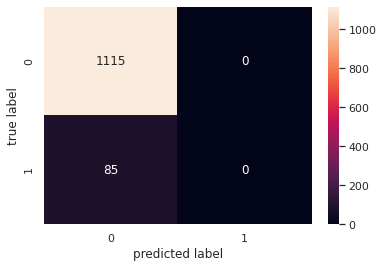

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
# check f1 score 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1115
           1       0.00      0.00      0.00        85

    accuracy                           0.93      1200
   macro avg       0.46      0.50      0.48      1200
weighted avg       0.86      0.93      0.90      1200



In [ ]:
# check mcc score
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_prediction))

0.0


As we found 0 as MCC score, it means that we made an average random prediction.

## Results & Discussion


**The confusion matrix obtained from the first model**


<br>
* Possible predicted classes: 1 and 0.
<br>
* The classifier made a total of 1200 predictions
<br>
* Out of 1200 cases, the classifier predicted 1 -> 12 times,0 -> 1188 times.
<br>
* In reality, we have 85 1's and 1115 0's. 
<br>
* At the end, this model classified 1125 data points correctly

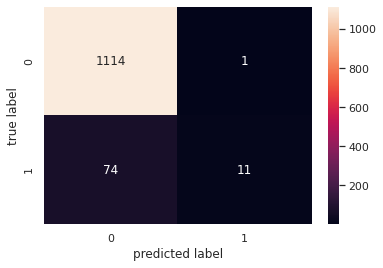

**The confusion matrix obtained from the second model** 
<br>
* Possible predicted classes: 1 and 0.
<br>
* The classifier made a total of 1200 predictions
<br>
* Out of 1200 cases, the classifier predicted 1 -> 0 times,0 -> 1200 times.
<br>
* In reality, we have 85 1's and 1115 0's. 
<br>
* At the end, this model classifies 1115 data points correctly

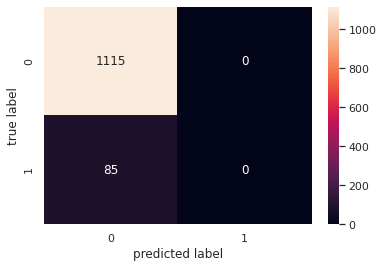

As we can see the first model gives better predictions than the second model.


In data exploration, we looked at distributions of children-friendly and non-friendly content in tv-shows and movies and their possible correlations with other attributes. As a result, we found out that there is a correlation between type of the content, director,genre, cast, duration, description and suitability of the content for children audience.
We observed that there is more content suitable for a children audience in tv shows rather than movies. One more observation was that some directors directed more child-friendly content, and some directed more content that is not suitable for a children audience, which was another important correlation we discovered. Similarly, the correlation between cast and suitability of their movies/tv-shows for children was significant, since we found out that some cast members were mostly starring in children friendly or mostly in children-unfriendly movies/tv-shows. Moreover, in some genres, the distribution significance was too high. For instance, "Thriller" genre is only filled with children-unfriendly ones. In contrast, "Kids" genre is mostly filled with children-friendly ones. Thus, genre distribution decided to be an important indicator while categorizing the movies/tv shows. Another important factor was “duration”. We observed that the shorter the duration of a movie/tv show is,  the more suitable it is for children. For instance, the mean duration of children-friendly movies is around 64 minutes, whereas the duration of children-unfriendly movies is around 102 minutes.
After analyzing these above mentioned findings, we decided to include them in our machine learning model.


For machine learning part, we have applied random forest and support vector machine models.
From the random forest model, we have obtained 93.66%  accuracy and for svm accuracy was 92.916 %   To improve these accuracies and acquire better models, we checked the descriptions of each movie/tv show, have implemented hyper-parameter tuning by grid search and confusion matrix for both models. Description data was implemented using the technique “bag of words”. For each movie/tv show, a word vector consists of the counts of the words constructed. Afterwards, “stop words” obtained from the NLTK package were discarded (such as “the”, “a”, …) to get better results. Overall, 14238 word vectors were left which are concatenated to the train and test sets respectively. Thus, we obtained 1200x14344 test set and 4799x14344 train set data frames. Then, we proceeded to hyper-parameter tuning. After tuning, the new accuracy value for random  forest is 93.75 %  and 92.916% accuracy value obtained for svm. We have chosen grid search because it applies cross validation and can find optimum parameters easily. Random forest model gave better results than svm in terms of accuracy.
 
For machine learning models, we have applied confusion matrix. Then, we looked into their f1 score to checked our accuracy scores from both models. Because f1 score consists precision and recall measurements. As a result we have seen that f1 scores were parallel with accuracy values and this gives a good indication of performance of the models. 


## Conclusion

In order to achieve the goal that we had, which was identifying and making classifications which are suitiable contents for children audience, we've divided our data as 80% for train and 20% for test. We've decided which categories are suitable for children. We've searched for correlations like ratings, directors, genres, cast members. When doing so, we've distributed ratings, plotted graphs, grouped by ratings/directors, found common directors by amount of movies/tv shows, distributed movies/tv shows among genres and cast members. In machine learning part, we applied random forest. Then we've used confusion matrix but it didn't change anything on accuracy. Our solution is applicable because our accuracy results are considerably high. This is also an advantage. Only disadvantage is that there is not much children friendly content.


## Future Work

<font color="black">
The duration column could be added to the machine learning model, since there is a significant correlation between duration and suitability of the content for children. To achieve that, the duration of tv shows could be extracted in “minutes” since they are represented in “seasons” in the current dataset.
<br> 
Moreover, description of the movies/tv shows can be evaluated using deep learning algorithms to take their meanings into account rather than only considering the word counts as we implemented in the project. 

<br>

</font>

## Work Division

<font color="black">

Dila Kurumahmutoğlu wrote introduction, problem definition and conclusion parts, implemented svm's hyper-parameter tuning.

Deniz Küçükahmetler worked on "Data Exploration", implementation of the "bag of words" and its adaptation to the data frame.

Guljahan Annagurbanova worked on "Data Exploration", added some attributes to ML model, and took part in "Results & Discussion"

Sabanur Mete implemented random forest model, its hyper-parameter tunning, wrote some parts of the proposal and disscussion.

</font>

Buket Özen did the utilized datasets part with preproccessing, implemented the second Machine Learning Algorithm and also worked collaboratively with Deniz on the "bag of words" implementation.